In [40]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers.merge import Concatenate

In [73]:

url = "https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/creditcard.csv"

creditcard = pd.read_csv(url)

creditcard.columns = [x.lower() for x in creditcard.columns]
creditcard.rename(columns = {'class': 'fraud'}, inplace = True)
print(creditcard.fraud.value_counts(dropna = False))

X = creditcard.drop("fraud", axis = 1)
y = creditcard["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, stratify = y, random_state = 42)

samples=1
timeSteps=10
features=len(creditcard.columns)

print (timeSteps)

data = np.resize(X_train,(X_train.shape[0],1,X_train.shape[1]))

print(data.shape)
print(data.shape[1])
print(data.shape[2])

#data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
#data = X.reshape(1,5,features)
#print(data)

0    56772
1      102
Name: fraud, dtype: int64
10
(38105, 1, 30)
1
30


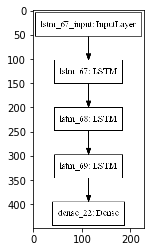

In [74]:


#Samples. One sequence is one sample. A batch is comprised of one or more samples.
#Time Steps. One time step is one point of observation in the sample.
#Features. One feature is one observation at a time step.



#input layer expects a 3D array of data when fitting the model and when making predictions, 
#even if specific dimensions of the array contain a single value, e.g. one sample or one feature.

#The input shape is supposed in the format (no_of_samples,no_of_timesteps,features)

#The input to every LSTM layer must be three-dimensional.
# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(32, activation='relu', return_sequences=True,
               batch_input_shape=(1,timeSteps, features)))  # returns a sequence of vectors of dimension 32

model.add(LSTM(32, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(32))  # return a single vector of dimension 32
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])





plot_model(model, to_file='model.png')
img=plt.imread('model.png')
plt.imshow(img)
plt.show()



In [75]:
# Generate dummy training data
#x_train = np.random.random((1000, timesteps, data_dim))
#y_train = np.random.random((1000, num_classes))

# Generate dummy validation data
x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

model.fit(X_train, y_train,
          batch_size=64, epochs=5,
          #validation_data=(x_val, y_val)
         )

ValueError: Error when checking input: expected lstm_67_input to have 3 dimensions, but got array with shape (38105, 30)

In [28]:
y_pred=model.predict(X_scaled)
buffer=y_pred.flatten()
#print(buffer)
yes=buffer[buffer>=.5]
no=buffer[buffer<.5]
print(len(yes))
print(len(no))

counts=[len(no),len(yes)]
plt.bar(range(2),counts)
plt.ylabel("Counts")
plt.xlabel("Rejection/Success")

plt.annotate(str(len(no)), xy=(0,len(no)))
plt.annotate(str(len(yes)), xy=(1,len(yes)))

plt.show

ValueError: Error when checking input: expected lstm_28_input to have 3 dimensions, but got array with shape (56874, 30)